### Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class WholeProject:
    
    # To read the dataset
    def read_dataset(self,file_path):
        df = pd.read_csv(file_path)
        return df[(df['District Name'] == 'Moga') | (df['District Name'] == 'Mohali') | (df['District Name'] == 'Mansa') | (df['District Name'] == 'Muktsar')]
    
    
    def check_missing(self,data):
        return data.isnull().sum()
    
    def handle_missing(self,col,data):
        data.fillna(value=data[col].mode()[0], inplace=True)
    
    def drop_unwanted_columns(self,col,data):
        data.drop(columns=col,axis=1,inplace=True)
    
    def rename_columns(self,col,new_col,data):
        data.rename(columns={col:new_col},inplace=True)
    
    def set_date_order(self,col,data):
        data[col] = pd.to_datetime(data[col]).dt.strftime('%d-%m-%Y')
    
    def extract_year(self,col,data):
            data['Year'] = data['Reported Date'].apply(lambda x: x[-4:])
            
    def update_Arrivals_column(self,col,data):
        data[col] = data[col].apply(lambda x: float(x.replace(',', '')) if ',' in x else float(x))
        data[col] = data[col]*10
        self.rename_columns(col,'Arrivals (Quintal)',data)
        
    
    def total_price(self,mass,price,data):
        data['Total Price'] = data[mass]*data[price]
    
    def pie_chart(self,x,y,data):
        colors = ['red', 'green', 'blue', 'yellow', 'orange']
        plt.pie(x=x,labels=y,autopct='%1.1f%%', startangle=140)
        plt.show()

In [3]:
obj = WholeProject()

In [17]:
data = obj.read_dataset('Datasets/project.csv')
data

,Unnamed: 0,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
138,139,Punjab,Moga,Ajitwal,Other,Cereals,2.2,2125.0,2125,2125,24-May-23
139,140,Punjab,Moga,Ajitwal,Other,Cereals,2.2,2125.0,2125,2125,23-May-23
140,141,Punjab,Moga,Ajitwal,Other,Cereals,1.65,2125.0,2125,2125,19-May-23
141,142,Punjab,Moga,Ajitwal,Other,Cereals,19.85,2125.0,2125,2125,18-May-23
142,143,Punjab,Moga,Ajitwal,Other,Cereals,25.7,2125.0,2125,2125,17-May-23
...,...,...,...,...,...,...,...,...,...,...,...
5047,5048,Punjab,Mansa,Sardulgarh,Other,Cereals,"8,365.00",1975.0,1975,1975,15-Apr-21
5048,5049,Punjab,Mansa,Sardulgarh,Other,Cereals,"6,890.00",1975.0,1975,1975,14-Apr-21
5049,5050,Punjab,Mansa,Sardulgarh,Other,Cereals,"5,880.00",1975.0,1975,1975,13-Apr-21
5050,5051,Punjab,Mansa,Sardulgarh,Other,Cereals,"6,030.00",1975.0,1975,1975,12-Apr-21


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 138 to 5051
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1106 non-null   int64  
 1   State Name                 1106 non-null   object 
 2   District Name              1106 non-null   object 
 3   Market Name                1106 non-null   object 
 4   Variety                    1106 non-null   object 
 5   Group                      1106 non-null   object 
 6   Arrivals (Tonnes)          1106 non-null   object 
 7   Min Price (Rs./Quintal)    1106 non-null   float64
 8   Max Price (Rs./Quintal)    1106 non-null   int64  
 9   Modal Price (Rs./Quintal)  1106 non-null   int64  
 10  Reported Date              1106 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 103.7+ KB


In [19]:
obj.check_missing(data)

Unnamed: 0                   0
State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Reported Date                0
dtype: int64

In [20]:
# Removing the 'Unnamed: 0', 'State Name', 'Group' columns because of low variance
obj.drop_unwanted_columns(['Unnamed: 0', 'State Name', 'Group'],data)

In [21]:
data.head()

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
138,Moga,Ajitwal,Other,2.2,2125.0,2125,2125,24-May-23
139,Moga,Ajitwal,Other,2.2,2125.0,2125,2125,23-May-23
140,Moga,Ajitwal,Other,1.65,2125.0,2125,2125,19-May-23
141,Moga,Ajitwal,Other,19.85,2125.0,2125,2125,18-May-23
142,Moga,Ajitwal,Other,25.7,2125.0,2125,2125,17-May-23


In [22]:
# Setting the order of date into date-month-year and extracting the year
obj.set_date_order('Reported Date',data)
obj.extract_year('Reported Date',data)
data.head()

,District Name,Market Name,Variety,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year
138,Moga,Ajitwal,Other,2.2,2125.0,2125,2125,24-05-2023,2023
139,Moga,Ajitwal,Other,2.2,2125.0,2125,2125,23-05-2023,2023
140,Moga,Ajitwal,Other,1.65,2125.0,2125,2125,19-05-2023,2023
141,Moga,Ajitwal,Other,19.85,2125.0,2125,2125,18-05-2023,2023
142,Moga,Ajitwal,Other,25.7,2125.0,2125,2125,17-05-2023,2023


In [23]:
# To change the data type of 'Arrivals (Tonnes)' column to float and make the weight tonnes to quintal. Finally extract the total price w.r.t Model Price
obj.update_Arrivals_column('Arrivals (Tonnes)',data)
obj.total_price('Arrivals (Quintal)','Modal Price (Rs./Quintal)',data)
data.head()

,District Name,Market Name,Variety,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Total Price
138,Moga,Ajitwal,Other,22.0,2125.0,2125,2125,24-05-2023,2023,46750.0
139,Moga,Ajitwal,Other,22.0,2125.0,2125,2125,23-05-2023,2023,46750.0
140,Moga,Ajitwal,Other,16.5,2125.0,2125,2125,19-05-2023,2023,35062.5
141,Moga,Ajitwal,Other,198.5,2125.0,2125,2125,18-05-2023,2023,421812.5
142,Moga,Ajitwal,Other,257.0,2125.0,2125,2125,17-05-2023,2023,546125.0


### To check the outliers in Variety column and Handle it

In [24]:
data.Variety.value_counts()

Other          933
147 Average    171
343              1
1482             1
Name: Variety, dtype: int64

In [25]:
data.loc[(data['Variety'] == '343') | (data['Variety'] == '1482'), 'Variety'] = 'Other'

In [26]:
data.Variety.value_counts()

Other          935
147 Average    171
Name: Variety, dtype: int64

In [27]:
price_mean = data['Total Price'].mean()
price_std = data['Total Price'].std()
price_out = data[((data['Total Price']<(price_mean-3*price_std)) | (data['Total Price']>(price_mean+3*price_std)))]
price_out_ind = price_out.index
print(price_out_ind)
price_out

Int64Index([1665, 2881, 2882, 2887, 2911, 2912, 2914, 2916, 2919, 2920, 2921,
            2922, 2923, 3110, 3650, 3651, 3652, 3653, 3656],
           dtype='int64')


,District Name,Market Name,Variety,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Total Price
1665,Moga,Dharamkot,Other,589020.0,1975.0,1975,1975,16-04-2021,2021,1.163314e+09
2881,Moga,Kot ise Khan,Other,415500.0,2015.0,2025,2020,21-04-2022,2022,8.393100e+08
2882,Moga,Kot ise Khan,Other,322500.0,2015.0,2025,2020,20-04-2022,2022,6.514500e+08
2887,Moga,Kot ise Khan,Other,347500.0,2015.0,2025,2020,15-04-2022,2022,7.019500e+08
2911,Moga,Kot ise Khan,Other,372500.0,1975.0,1985,1980,28-04-2021,2021,7.375500e+08
2912,Moga,Kot ise Khan,Other,500000.0,1975.0,1985,1980,27-04-2021,2021,9.900000e+08
2914,Moga,Kot ise Khan,Other,315000.0,1975.0,1985,1980,25-04-2021,2021,6.237000e+08
2916,Moga,Kot ise Khan,Other,642500.0,1975.0,1985,1980,23-04-2021,2021,1.272150e+09
2919,Moga,Kot ise Khan,Other,352500.0,1975.0,1985,1980,20-04-2021,2021,6.979500e+08
2920,Moga,Kot ise Khan,Other,530000.0,1975.0,1985,1980,19-04-2021,2021,1.049400e+09


## District Visualization

In [29]:
dist_grp = data.groupby('District Name')

### Pie Chart to know which District contains maximum average price 

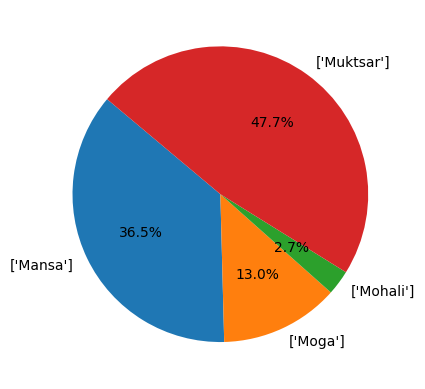

District Name
Mansa      5.681188e+09
Moga       2.024985e+09
Mohali     4.230058e+08
Muktsar    7.424714e+09
dtype: float64

In [30]:
result = dist_grp.apply(lambda group: group[group['Year'].str.contains('2023')]['Total Price'].sum())
obj.pie_chart(result,dist_grp['District Name'].unique(),data)
result

In [ ]:
data[(data['District Name']=='Moga') & (data['Year']=='2023')]['Total Price'].mean() > data[(data['District Name']=='Mansa') & (data['Year']=='2023')]['Total Price'].mean()